# MNIST Data Set - Basic Approach

### Get the MNIST Data

In [79]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
from tensorflow.examples.tutorials.mnist import input_data

In [82]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

## Create the Model

In [83]:
#input layer
x = tf.placeholder(tf.float32,shape=[None,784])  # we have 28*28 image we make it into 784 in flatten formate 

In [84]:
# first hidden layer
W1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1)) # first hidden layer we have 200 neurons
b1 = tf.Variable(tf.zeros([200]))  # we give 200 bias 

In [85]:
#output of first hidden layer
y1 = tf.nn.relu(tf.matmul(x,W1) + b1) # we use the relu for the multiple layers in the network

In [86]:
# second hidden layer
W2 = tf.Variable(tf.truncated_normal([200,100],stddev=0.1)) # nest layer 2 we add another 100 neutros
b2 = tf.Variable(tf.zeros([100]))   #we give 100 bias to it 

In [87]:
#output of second hidden layer
y2 = tf.nn.relu(tf.matmul(y1,W2) + b2)

In [88]:
# third hidden layer
W3 = tf.Variable(tf.truncated_normal([100,60],stddev=0.1))
b3 = tf.Variable(tf.zeros([60]))

In [89]:
#output of third hidden layer
y3 = tf.nn.relu(tf.matmul(y2,W3) + b3)

In [90]:
# fourth hidden layer
W4 = tf.Variable(tf.truncated_normal([60,30],stddev=0.1))
b4 = tf.Variable(tf.zeros([30]))

In [91]:
#output of fourth hidden layer
y4 = tf.nn.relu(tf.matmul(y3,W4) + b4)

In [92]:
#softmax layer

In [93]:
# 10 because 0-9 possible numbers
W5 = tf.Variable(tf.truncated_normal([30,10],stddev=0.1))   #this is the final output layer we give 10 possible outpus from the datsset

In [94]:
b5 = tf.Variable(tf.zeros([10]))

In [95]:
#Net input function of last layer ...without activation function
y = tf.matmul(y4,W5) + b5 

Loss and Optimizer

In [96]:
y_true = tf.placeholder(tf.float32,[None,10])

In [97]:
# Cross Entropy

In [98]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))  ##output and predicted output

In [99]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [100]:
train = optimizer.minimize(cross_entropy)

### Create Session

In [101]:
init = tf.global_variables_initializer()

In [102]:
sess=tf.Session()
sess.run(init)

In [103]:
#training
for step in range(100):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

In [104]:
#now test - first pass the last layer output I - through softmax activation
softmaxoutput=tf.nn.softmax(y)
#now run this node in a session
predict=sess.run(softmaxoutput,feed_dict={x:mnist.test.images})

In [105]:
#argmax will give the predicted value in terms of a number
result=sess.run(tf.argmax(predict,1))

In [106]:
#same way get the label value using argmax
labhot=sess.run(tf.argmax(mnist.test.labels,1))

In [107]:
accuracy_score(result,labhot)accuracy_score(result,labhot)

0.851

In [108]:
#inference

In [109]:
#fetch one image from the test data set
test_image,test_label=mnist.test.next_batch(1) 

In [110]:
#run inference    
mymax=tf.argmax(y,1)
print("Predicted value:")
print(sess.run(mymax,feed_dict={x:test_image}))

Predicted value:
[0]


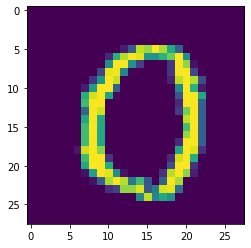

In [111]:
#display the image
plt.imshow(test_image.reshape(28,28))

## sec

In [151]:
x = tf.placeholder(tf.float32,shape=[None,784])
y_true = tf.placeholder(tf.float32,[None,10])

In [152]:
#first hidden layer
w1=tf.Variable(tf.truncated_normal([784,50],stddev=0.1))
b1=tf.Variable(tf.zeros([50]))
y1=tf.nn.relu(tf.matmul(x,w1)+b1)

In [153]:
#second layer
w2=tf.Variable(tf.truncated_normal([50,350],stddev=0.1))
b2=tf.Variable(tf.zeros([350]))
y2=tf.nn.relu(tf.matmul(y1,w2)+b2)

In [154]:
#third layer 
w3=tf.Variable(tf.truncated_normal([350,650],stddev=0.0))
b3=tf.Variable(tf.zeros(650))
y3=tf.nn.relu(tf.matmul(y2,w3)+b3)

In [155]:
#fourth  layer
w4=tf.Variable(tf.truncated_normal([650,10],stddev=0.01))
b4=tf.Variable(tf.zeros(10))
y4=tf.nn.softmax(tf.matmul(y3,w4)+b4)

In [156]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y4))
#label is the data output 
#and the logits is the final layer output

In [157]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [158]:
train = optimizer.minimize(cross_entropy)

In [159]:
init = tf.global_variables_initializer()

In [160]:
sess=tf.Session()
sess.run(init)

In [161]:
batch_y.shape

(100, 10)

In [179]:
batch_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [162]:
#training
for step in range(100):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

In [163]:
softmaxoutput=tf.nn.softmax(y4)

In [164]:
predict=sess.run(softmaxoutput,feed_dict={x:mnist.test.images})

In [165]:
result=sess.run(tf.argmax(predict,1)) #axis 1

In [166]:
labhot=sess.run(tf.argmax(mnist.test.labels,1))

In [167]:
accuracy_score(result,labhot)

0.1135

In [168]:
#fetch one image from the test data set
test_image,test_label=mnist.test.next_batch(1) 

In [169]:
#run inference    
mymax=tf.argmax(y4,1)
print("Predicted value:")
print(sess.run(mymax,feed_dict={x:test_image}))

Predicted value:
[1]


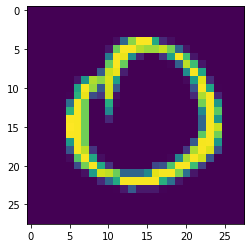

In [170]:
#display the image
plt.imshow(test_image.reshape(28,28))

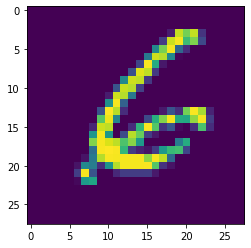

In [171]:
plt.imshow(mnist.validation.images[2516].reshape(28,28))

In [172]:

mymax=tf.argmax(y4,1)
print("Predicted value:")
print(sess.run(mymax,feed_dict={x:test_image}))

Predicted value:
[1]


In [173]:
test_image=mnist.validation.images[2156].reshape(1,784)   

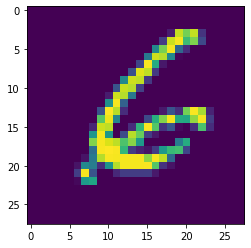

In [174]:
plt.imshow(mnist.validation.images[2516].reshape(28,28))

In [1]:
plt.imshow(mnist.validation.images[2816].reshape(28,28))

NameError: name 'plt' is not defined

In [176]:
test_image=mnist.validation.images[2916].reshape(1,784)   

In [177]:
mymax=tf.argmax(y4,1)
print("Predicted value:")
print(sess.run(mymax,feed_dict={x:test_image}))


Predicted value:
[1]


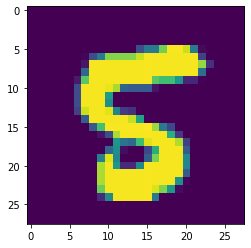

In [178]:
plt.imshow(mnist.validation.images[2916].reshape(28,28))

In [3]:
test_image=X_test[100].reshape(28,28)

NameError: name 'X_test' is not defined

In [ ]:
test_image=np.as(test_image)

In [ ]:
#predict expect a batch of image we add a dummieds dim
test_image=test_image.reshape(1,28,28,1)

In [ ]:
result=model.predict(test_image)

In [ ]:
result

In [ ]:
np.around(result)

In [ ]:
(np.around(result)).argmax()

## to save the file

In [ ]:
## to save the model
model_json=model.to_json()
with open('multiclass.json','w') as json_file:
    json_file.write(model_json)
    
#serialize weights to h5
model.save_weights('multiclass.h5')
print('save model to disk')



## to load the data file

In [ ]:
from keras.models import model_from_json

#load json and create the model

json_file=opoen('multiclass.json','r')
loaded_model_json=json_file.read()
json_file.close()

loaded_model=model_from_json(loaded_model_json)
#load weight into model

loaded_model.load_weights('multiclass.h5')
print('load model from the disk')